# **Denavit–Hartenberg parameters**

Question 3: [3 Marks]
Write a computer program to solve the forward kinematics of a manipulator. Specifically, given the 
joint variables and DH parameters, your program should be able to:
1. Calculate a T
i
i−1 matrix;
2. Calculate the manipulator transformation matrix, i.e., T0
n
;
3. Calculate the Cartesian space coordinates of the end-effector, i.e., the position vector and the 
orientation relative to the base of the manipulator.
Your program should be written in a generic way independent of any specific manipulator
configuration. Use C / C++ /Python programming language.
NOTES: 
a) Please perform the computations for the three sub questions in different modules/functions/methods 
(the modules may access each other). Please insert comments accordingly.
b) Please use the classic (and not modified) DH Parameters as taught in the class.
c) Clearly mention the final input DH table and the corresponding output matrix.
4. Use the data from the PUMA manipulator to test your program.
Assume non-zero joint angles for the arm.
Submit your source codes (well-documented) and the output of calculation for the PUMA

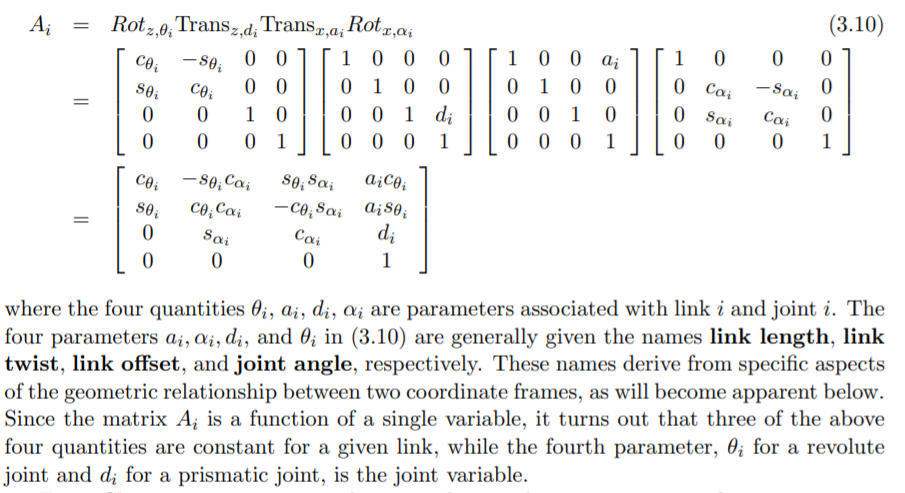

In [ ]:
import math
pi=math.pi

In [ ]:
def multiply(X,Y):
  result = [[0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0]]

# iterate through rows of X
  for i in range(len(X)):
     # iterate through columns of Y
     for j in range(len(Y[0])):
         # iterate through rows of Y
         for k in range(len(Y)):
            result[i][j] += X[i][k] * Y[k][j]
  return result

In [ ]:
def Transform(M,i):
  
 [θ,d,a,α]=[M[i][0],M[i][1],M[i][2],M[i][3]] 

 θ=θ*pi/180; α=α*pi/180

 cθ=math.cos(θ); sθ=math.sin(θ)
 cα=math.cos(α); sα=math.sin(α)

 M1=[[cθ,-sθ,0,0],
     [sθ, cθ,0,0],
     [0,  0, 1,0],
     [0,  0, 0,1]]

 M2=[[1,0,0,0],
     [0,1,0,0],
     [0,0,1,d],
     [0,0,0,1]]

 M3=[[1,0,0,a],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

 M4=[[1,0,  0 ,0],
     [0,cα,-sα,0],
     [0,sα, cα,0],
     [0,0,  0, 1]]

 T=multiply(multiply(multiply(M1,M2),M3),M4)

 return T

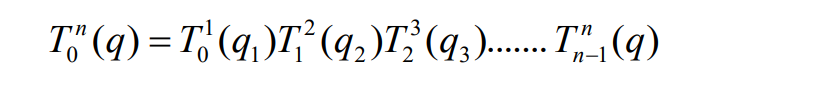

In [ ]:
def DH(dh):
  T = [[1,0,0,0],
       [0,1,0,0],
       [0,0,1,0],
       [0,0,0,1]]
  for i in range(n):
    T=multiply(T,Transform(dh,i))
  
  return T

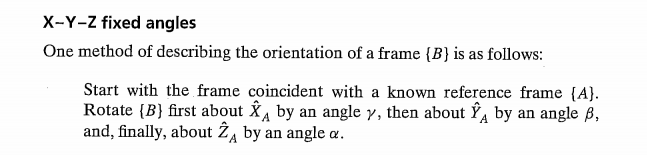

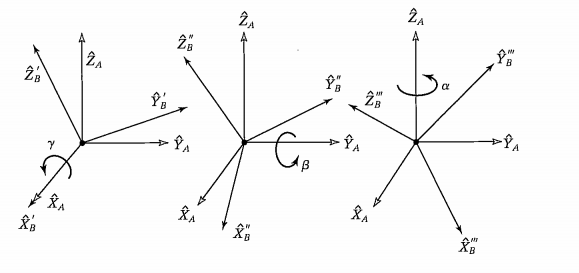

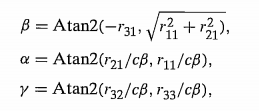

In [ ]:
def EndEff(M):
  [x,y,z]=[ M[0][3], M[1][3], M[2][3] ]
  
  # CONSIDERING X-Y-Z FIXED ANGLE ROTATION
  pitch   = math.atan2(-M[2][0],(M[0][0]**2 + M[1][0]**2)**0.5)

  CB = math.cos(pitch); SB = math.sin(pitch)

  roll = math.atan2(M[1][0]/CB,M[0][0]/CB)
  yaw  = math.atan2(M[2][1]/CB,M[2][2]/CB)

  return [ x , y , z , yaw , pitch , roll ]


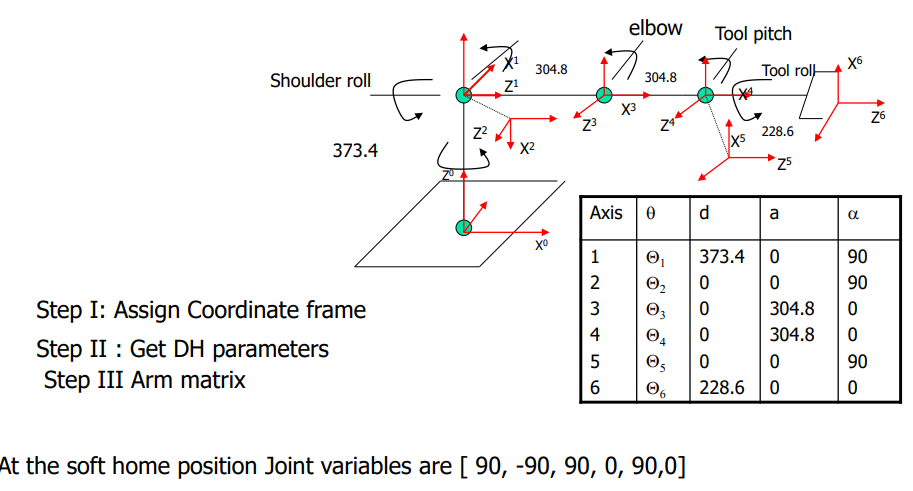

In [ ]:
if __name__ == '__main__':
  print("Enter number of links")
  N=input()
  n=int(N)
  dh=[]
  print("Enter DH Params in θ d a α order")
  for i in range(n):
    s=input().split()
    a=[]
    for j in range(4):
      a.append(float(s[j]))
    dh.append(a)
  print("DH PARAM MATRIX ")
  print(" θ, d, a, α ")
  for i in range(n):
    print(dh[i])
  
  print("")
  print("---------------------------------------")
  for i in range(n):
    print("")
    print("T: ",i," -> ",i+1)
    print("")
    T=Transform(dh,i)
    for i in range(4):
      for j in range(4):
        T[i][j]=int(T[i][j])
    for j in range(4):
      print(T[j])

  print("")
  print("----------------------------------------")
  print("MANIPULATOR TRANSFORMATION MATRIX")
  print("T: ",0," -> ",n)
  print("")
  T=DH(dh)
  for i in range(4):
    for j in range(4):
      T[i][j]=int(T[i][j])

  for j in range(4):
    print(T[j])

  [x,y,z,yaw,pitch,roll] = EndEff(T)

  print("----------------------------------------")
  print("END EFFECTOR POSITION WRT BASE")
  print("x:",x,"y:",y,"z:",z)
  print("")
  print("END EFFECTOR ORIENTATION WRT BASE")
  print("yaw:",int(yaw*180/pi),"deg    pitch:",int(pitch*180/pi),"deg   roll:",int(roll*180/pi),"deg")

Enter number of links
6
Enter DH Params in θ d a α order
90 373.4 0 90
-90 0 0 90
90 0 304.8 0
0 0 304.8 0
90 0 0 90
0 228.6 0 0
DH PARAM MATRIX 
 θ, d, a, α 
[90.0, 373.4, 0.0, 90.0]
[-90.0, 0.0, 0.0, 90.0]
[90.0, 0.0, 304.8, 0.0]
[0.0, 0.0, 304.8, 0.0]
[90.0, 0.0, 0.0, 90.0]
[0.0, 228.6, 0.0, 0.0]

---------------------------------------

T:  0  ->  1

[0, 0, 1, 0]
[1, 0, 0, 0]
[0, 1, 0, 373]
[0, 0, 0, 1]

T:  1  ->  2

[0, 0, -1, 0]
[-1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 0, 1]

T:  2  ->  3

[0, -1, 0, 0]
[1, 0, 0, 304]
[0, 0, 1, 0]
[0, 0, 0, 1]

T:  3  ->  4

[1, 0, 0, 304]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]

T:  4  ->  5

[0, 0, 1, 0]
[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 0, 1]

T:  5  ->  6

[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 228]
[0, 0, 0, 1]

----------------------------------------
MANIPULATOR TRANSFORMATION MATRIX
T:  0  ->  6

[0, 0, 1, 838]
[0, -1, 0, 0]
[1, 0, 0, 373]
[0, 0, 0, 1]
----------------------------------------
END EFFECTOR POSITION WRT BASE
x: 838 y: 0 z: 373

END EF

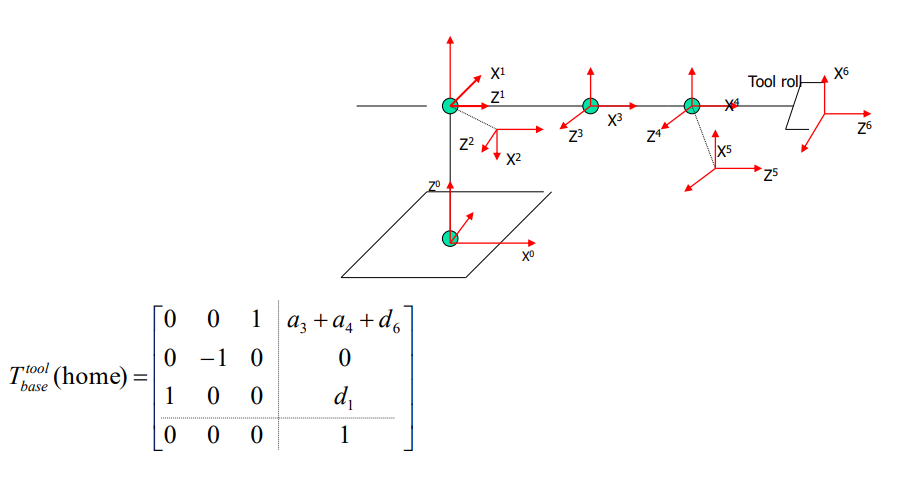

In [ ]:
if __name__ == '__main__':
  print("Enter number of links")
  N=input()
  n=int(N)
  dh=[]
  print("Enter DH Params in θ d a α order")
  for i in range(n):
    s=input().split()
    a=[]
    for j in range(4):
      a.append(float(s[j]))
    dh.append(a)
  print("DH PARAM MATRIX ")
  print(" θ, d, a, α ")
  for i in range(n):
    print(dh[i])
  
  print("")
  print("---------------------------------------")
  for i in range(n):
    print("")
    print("T: ",i," -> ",i+1)
    print("")
    T=Transform(dh,i)
    for i in range(4):
      for j in range(4):
        T[i][j]=int(T[i][j])
    for j in range(4):
      print(T[j])

  print("")
  print("----------------------------------------")
  print("MANIPULATOR TRANSFORMATION MATRIX")
  print("T: ",0," -> ",n)
  print("")
  T=DH(dh)
  for i in range(4):
    for j in range(4):
      T[i][j]=int(T[i][j])

  for j in range(4):
    print(T[j])

  [x,y,z,yaw,pitch,roll] = EndEff(T)

  print("----------------------------------------")
  print("END EFFECTOR POSITION WRT BASE")
  print("x:",x,"y:",y,"z:",z)
  print("")
  print("END EFFECTOR ORIENTATION WRT BASE")
  print("yaw:",int(yaw*180/pi),"deg    pitch:",int(pitch*180/pi),"deg   roll:",int(roll*180/pi),"deg")

Enter number of links
6
Enter DH Params in θ d a α order
0 100 0 -90
0 200 0 90
0 0 0 0
0 60 0 -90
0 0 0 90
0 50 0 0
DH PARAM MATRIX 
 θ, d, a, α 
[0.0, 100.0, 0.0, -90.0]
[0.0, 200.0, 0.0, 90.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 60.0, 0.0, -90.0]
[0.0, 0.0, 0.0, 90.0]
[0.0, 50.0, 0.0, 0.0]

---------------------------------------

T:  0  ->  1

[1, 0, 0, 0]
[0, 0, 1, 0]
[0, -1, 0, 100]
[0, 0, 0, 1]

T:  1  ->  2

[1, 0, 0, 0]
[0, 0, -1, 0]
[0, 1, 0, 200]
[0, 0, 0, 1]

T:  2  ->  3

[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]

T:  3  ->  4

[1, 0, 0, 0]
[0, 0, 1, 0]
[0, -1, 0, 60]
[0, 0, 0, 1]

T:  4  ->  5

[1, 0, 0, 0]
[0, 0, -1, 0]
[0, 1, 0, 0]
[0, 0, 0, 1]

T:  5  ->  6

[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 50]
[0, 0, 0, 1]

----------------------------------------
MANIPULATOR TRANSFORMATION MATRIX
T:  0  ->  6

[1, 0, 0, 0]
[0, 1, 0, 200]
[0, 0, 1, 210]
[0, 0, 0, 1]
----------------------------------------
END EFFECTOR POSITION WRT BASE
x: 0 y: 200 z: 210

END EFFECTOR ORIENTATION

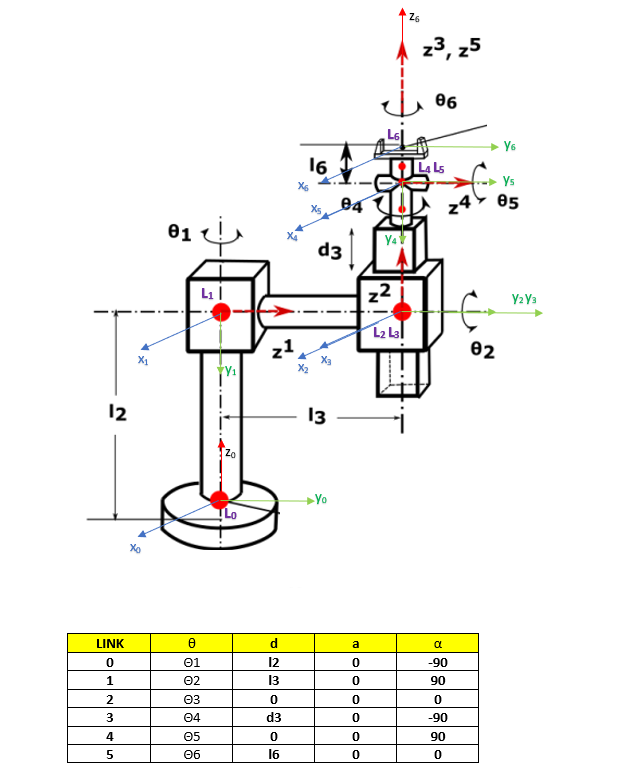